# ASSISTments2017 Data Analysis

## Data Description

### Column Description


| Field    | Annotation                                          |
| :- | :- |

In [23]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [24]:
path = "../../../../NCAT/data/assist-2017/assist-2017.csv"
data = pd.read_csv(path, encoding = "ISO-8859-15",low_memory=False) 

In [25]:
pd.set_option('display.max_columns', 500)
data.head() 

,studentId,MiddleSchoolId,InferredGender,SY ASSISTments Usage,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming,action_num,skill,problemId,problemType,assignmentId,assistmentId,startTime,endTime,timeTaken,correct,original,hint,hintCount,hintTotal,scaffold,bottomHint,attemptCount,frIsHelpRequest,frPast5HelpRequest,frPast8HelpRequest,stlHintUsed,past8BottomOut,totalFrPercentPastWrong,totalFrPastWrongCount,frPast5WrongCount,frPast8WrongCount,totalFrTimeOnSkill,timeSinceSkill,frWorkingInSchool,totalFrAttempted,totalFrSkillOpportunities,responseIsFillIn,responseIsChosen,endsWithScaffolding,endsWithAutoScaffolding,frTimeTakenOnScaffolding,frTotalSkillOpportunitiesScaffolding,totalFrSkillOpportunitiesByScaffolding,frIsHelpRequestScaffolding,timeGreater5Secprev2wrong,sumRight,helpAccessUnder2Sec,timeGreater10SecAndNextActionRight,consecutiveErrorsInRow,sumTime3SDWhen3RowRight,sumTimePerSkill,totalTimeByPercentCorrectForskill,Prev5count,timeOver80,manywrong,confidence(BORED),confidence(CONCENTRATING),confidence(CONFUSED),confidence(FRUSTRATED),confidence(OFF TASK),confidence(GAMING),RES_BORED,RES_CONCENTRATING,RES_CONFUSED,RES_FRUSTRATED,RES_OFFTASK,RES_GAMING,Ln-1,Ln,MCAS,Enrolled,Selective,isSTEM
0,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561,9950,properties-of-geometric-figures,1118,textfieldquestion,20405010,104051118,1096470301,1096470350,49.0,0,1,1,1,1,0,0,1,1,0,0,0,0,0.0,0,0,0,0.0,0.0,1,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,49.0,0.000000,0,0,0,0.597865,0.234294,0.0000,0.0,0.838710,0.008522,0.376427,0.320317,0.000000,0.0,0.785585,0.000264,0.13,0.061190409,45,0,0,NaN
1,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561,9951,properties-of-geometric-figures,1119,noprobtype,20405010,104051119,1096470350,1096470354,4.0,1,0,0,0,0,1,0,1,1,1,1,0,0,0.0,0,0,0,49.0,0.0,1,1,1,0,0,1,0,4.0,0,0.0,1,0,1,0,1,0,0.0,53.0,106.000000,1,0,0,0.355694,0.992585,0.9375,0.0,0.600000,0.047821,0.156027,0.995053,0.887452,0.0,0.468252,0.001483,0.061190409,0.213509945,45,0,0,NaN
2,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561,9952,sum-of-interior-angles-more-than-3-sides,1120,noprobtype,20405010,104051120,1096470354,1096470360,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,0,0.0,0.0,1,2,0,0,0,0,0,6.0,0,0.0,0,0,1,0,0,0,0.0,6.0,0.000000,2,0,0,0.355694,0.992585,0.9375,0.0,0.600000,0.047821,0.156027,0.995053,0.887452,0.0,0.468252,0.001483,0.116,0.033305768,45,0,0,NaN
3,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561,9953,sum-of-interior-angles-more-than-3-sides,1120,noprobtype,20405010,104051120,1096470360,1096470378,18.0,0,0,0,0,0,0,0,2,0,0,0,0,0,0.0,1,0,0,0.0,0.0,1,3,1,0,0,0,0,6.0,1,0.0,0,0,1,0,0,1,0.0,24.0,0.000000,3,0,0,0.355694,0.617065,0.0000,0.0,0.204082,0.343996,0.156027,0.744520,0.000000,0.0,0.108417,0.010665,0.116,0.033305768,45,0,0,NaN
4,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561,9954,sum-of-interior-angles-more-than-3-sides,1121,noprobtype,20405010,104051121,1096470378,1096470380,2.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1.0,1,1,1,6.0,0.0,1,3,1,0,0,0,0,2.0,1,1.0,0,0,2,0,1,0,0.0,26.0,77.999999,4,0,1,0.355694,0.617065,0.0000,0.0,0.204082,0.343996,0.156027,0.744520,0.000000,0.0,0.108417,0.010665,0.033305768,0.118385889,45,0,0,NaN


----
## General features

In [26]:
data.keys()

Index(['studentId', 'MiddleSchoolId', 'InferredGender', 'SY ASSISTments Usage',
       'AveKnow', 'AveCarelessness', 'AveCorrect', 'NumActions', 'AveResBored',
       'AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask',
       'AveResGaming', 'action_num', 'skill', 'problemId', 'problemType',
       'assignmentId', 'assistmentId', 'startTime', 'endTime', 'timeTaken',
       'correct', 'original', 'hint', 'hintCount', 'hintTotal', 'scaffold',
       'bottomHint', 'attemptCount', 'frIsHelpRequest', 'frPast5HelpRequest',
       'frPast8HelpRequest', 'stlHintUsed', 'past8BottomOut',
       'totalFrPercentPastWrong', 'totalFrPastWrongCount', 'frPast5WrongCount',
       'frPast8WrongCount', 'totalFrTimeOnSkill', 'timeSinceSkill',
       'frWorkingInSchool', 'totalFrAttempted', 'totalFrSkillOpportunities',
       'responseIsFillIn', 'responseIsChosen', 'endsWithScaffolding',
       'endsWithAutoScaffolding', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding',
 

In [27]:
print("The number of records: " + str(len(data['action_num'].unique())))
#or use print(data['action_num'].count())

The number of records: 942816


In [28]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
studentId               0.000000
MiddleSchoolId          0.000000
InferredGender          0.184189
SY ASSISTments Usage    0.000000
AveKnow                 0.000000
                          ...   
Ln                      0.000000
MCAS                    0.000000
Enrolled                0.000000
Selective               0.000000
isSTEM                  0.663801
Length: 82, dtype: float64


In [29]:
len(data.studentId.unique())

1709

In [30]:
len(data.skill.unique())

102

In [31]:
len(data.MiddleSchoolId.unique())

4

*****
## Sort by student id

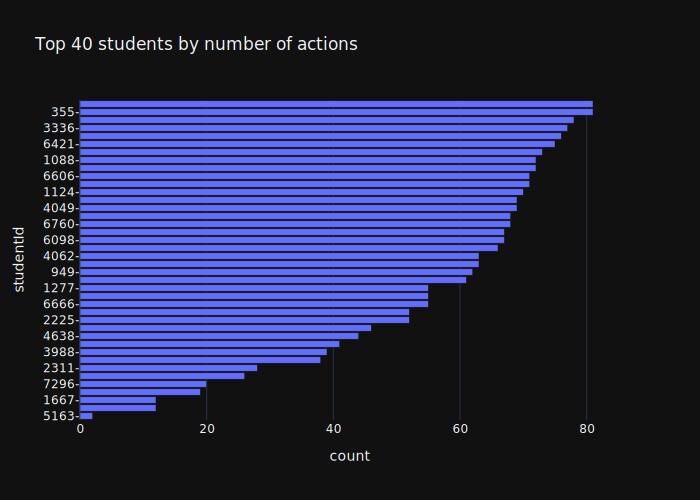

In [42]:
ds = data['studentId'].value_counts().reset_index() #value_counts以后studentid是index，需要reset 

ds.columns = [
    'studentId',
    'count'
]

ds['studentId'] = ds['studentId'].astype(str) + '-' #将数据转成str类。否则纵坐标出错
ds = ds.sort_values(['count']).iloc[0:40]

fig = px.bar(
    ds,
    x = 'count',
    y = 'studentId',
    orientation='h',
    title='Top 40 students by number of actions'
)

fig.show("svg")

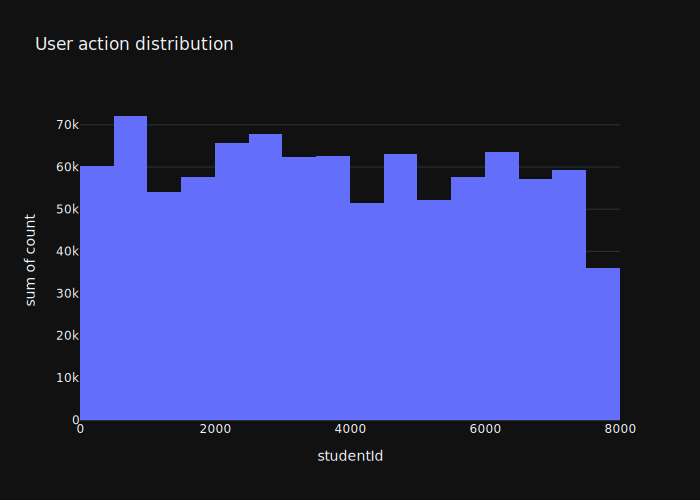

In [33]:
ds = data['studentId'].value_counts().reset_index()

ds.columns = [
    'studentId',
    'count'
]
## Correct answers
ds = ds.sort_values('studentId')

fig = px.histogram(
    ds,
    x = 'studentId',
    y = 'count',
    title = 'User action distribution'
)

fig.show("svg")

****
## Sort by MiddleSchoolId

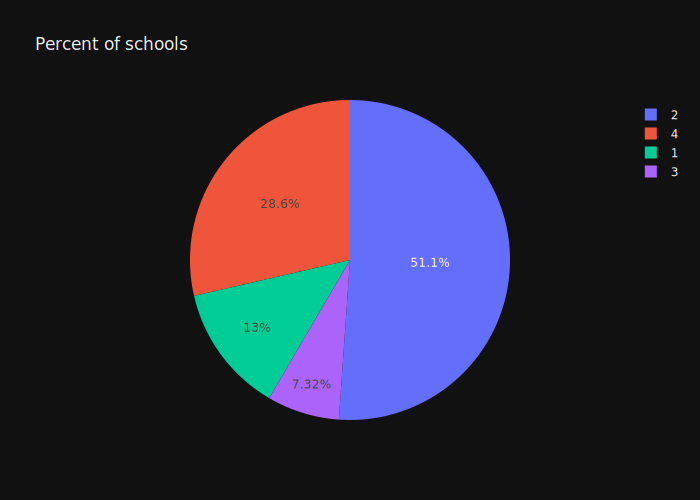

In [34]:
ds = data['MiddleSchoolId'].value_counts().reset_index()

ds.columns = [
    'MiddleSchoolId',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'MiddleSchoolId',
    values = 'percent',
    title = 'Percent of schools',
)

fig.show("svg")

*****
## Sort by correct answers

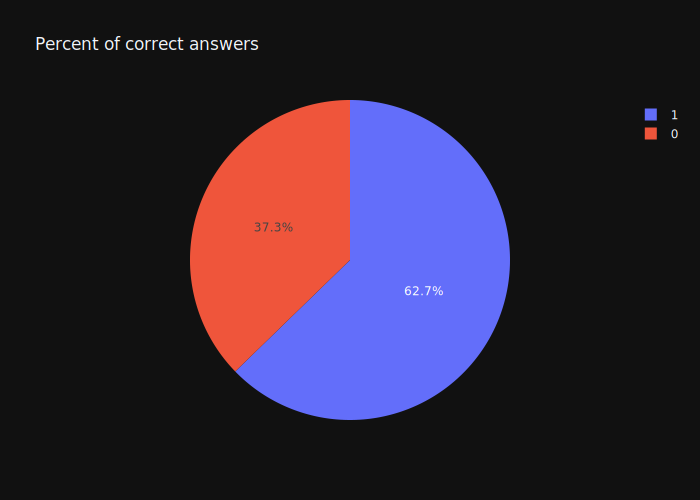

In [35]:
ds = data['correct'].value_counts().reset_index()

ds.columns = [
    'correct',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = ['0', '1'],
    values = 'percent',
    title = 'Percent of correct answers'    
)

fig.show("svg")


*******
## Sort by problem id

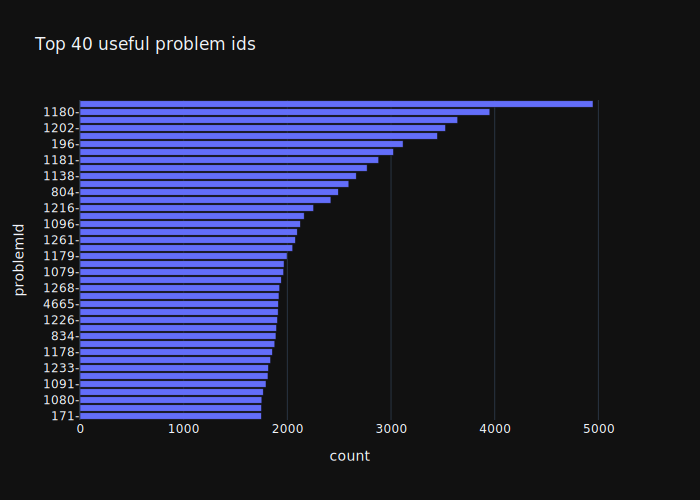

In [36]:
ds = data['problemId'].value_counts().reset_index()

ds.columns = [
    'problemId',
    'count'
]

ds['problemId'] = ds['problemId'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'problemId',
    orientation = 'h',
    title = 'Top 40 useful problem ids'
)

fig.show("svg")

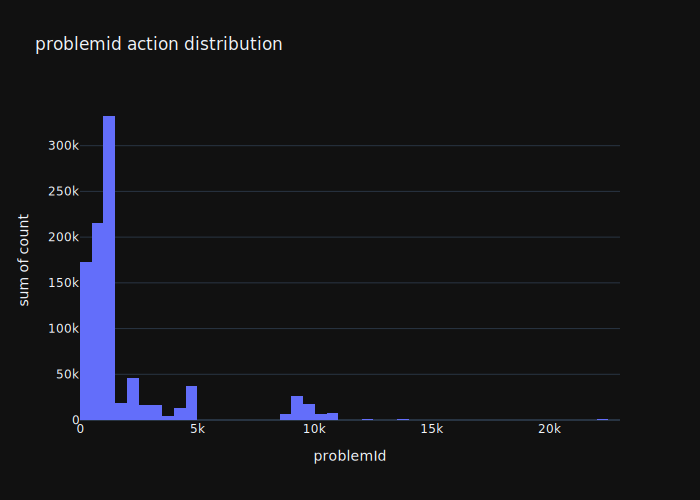

In [37]:
ds = data['problemId'].value_counts().reset_index()

ds.columns = [
    'problemId', 
    'count'
]

ds = ds.sort_values('problemId')

fig = px.histogram(
    ds, 
    x='problemId', 
    y='count', 
    title='problemid action distribution'
)

fig.show("svg")

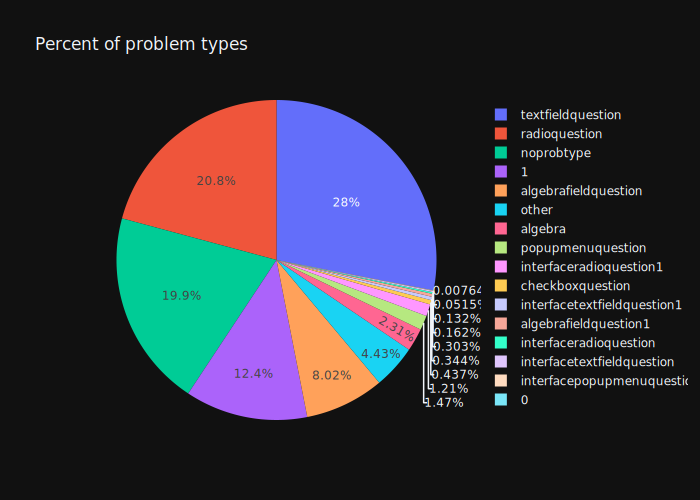

In [38]:
ds = data['problemType'].value_counts().reset_index()

ds.columns = [
    'problemType',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'problemType',
    values = 'percent',
    title = 'Percent of problem types',
)

fig.show("svg")

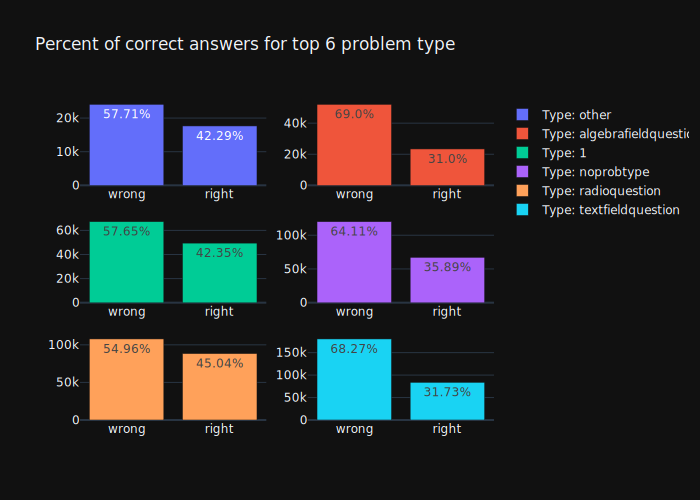

In [39]:
ds = ds.sort_values(['percent']).tail(6)

fig = make_subplots(rows=3, cols=2)

traces = [
    go.Bar(
        x = ['wrong', 'right'],
        y = [
            len(data[(data['problemType'] == item) & (data['correct'] == 0)]),
            len(data[(data['problemType'] == item) & (data['correct'] == 1)])
        ],
        name = 'Type: ' + str(item),
        text = [
            str(round(100*len(data[(data['problemType'] == item)&(data['correct'] == 0)])/len(data[data['problemType'] == item]),2)) + '%',
            str(round(100*len(data[(data['problemType'] == item)&(data['correct'] == 1)])/len(data[data['problemType'] == item]),2)) + '%'
        ],
        textposition = 'auto'
    ) for item in ds['problemType'].unique().tolist()
]

for i in range(len(traces)):
    fig.append_trace(
        traces[i],
        (i //2) + 1,
        (i % 2) + 1
    )
    
fig.update_layout(
    title_text = 'Percent of correct answers for top 6 problem type',
)

fig.show("svg")

*******
## Sort by skills

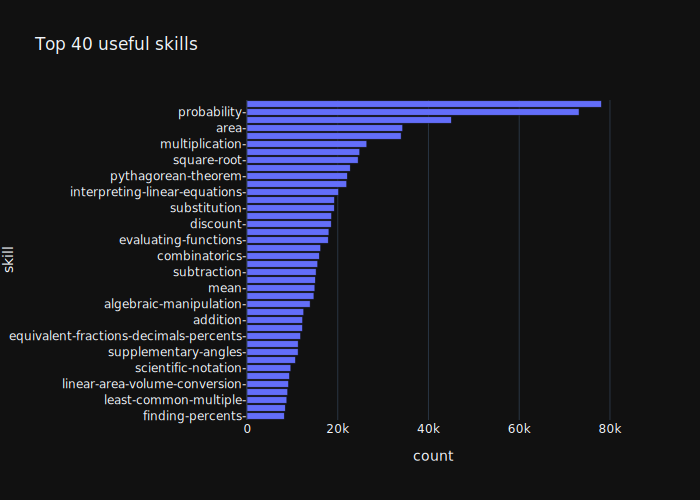

In [40]:
ds = data['skill'].dropna() # There are less NaNs in 'skill_id' column than 'skill_name' column.
ds = ds.value_counts().reset_index()

ds.columns = [
    'skill',
    'count'
]

ds['skill'] = ds['skill'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'skill',
    orientation = 'h',
    title = 'Top 40 useful skills'
)

fig.show("svg")